<a href="https://colab.research.google.com/github/SunYutongAmber/portfolio/blob/main/Final%20Project/code/Final_Analyze_Cryptopunks_Data_Machine_Learning_for_Predicting_Market_Congestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [238]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [239]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [240]:
C_train = pd.read_csv("https://raw.githubusercontent.com/SunYutongAmber/portfolio/main/Final%20Project/data/Final_Classification_Train.csv")
C_test = pd.read_csv("https://raw.githubusercontent.com/SunYutongAmber/portfolio/main/Final%20Project/data/Final_Classification_Test.csv")

In [241]:
C_train.isna().sum()

Unnamed: 0            0
high_return           0
ROI_past_average10    1
dtype: int64

## Drop nan for classification Data

In [242]:
C_train =C_train.dropna()

In [243]:
C_train.head()

,Unnamed: 0,high_return,ROI_past_average10
1,2,0,0.256252
2,3,0,-0.015182
3,4,1,-0.017117
4,5,1,0.146998
5,6,0,0.176230


In [244]:
C_test.isna().sum()

Unnamed: 0            0
high_return           0
ROI_past_average10    0
dtype: int64

## import train and test data for Regression

In [245]:
R_train = pd.read_csv("https://raw.githubusercontent.com/SunYutongAmber/portfolio/main/Final%20Project/data/Final_Regression_Train_Cryptopunks.csv")
R_test = pd.read_csv("https://raw.githubusercontent.com/SunYutongAmber/portfolio/main/Final%20Project/data/Final_Regression_Test_Cryptopunks.csv")

## drop nan for Regression Data

In [246]:
R_train.isna().sum()

Unnamed: 0            0
ROI                   0
ROI_past_average10    1
dtype: int64

In [247]:
R_train=R_train.dropna()

In [248]:
R_test.isna().sum()

Unnamed: 0            0
ROI                   0
ROI_past_average10    0
dtype: int64

In [249]:
R_train.head()

,Unnamed: 0,ROI,ROI_past_average10
1,2,-0.286615,0.256252
2,3,-0.020988,-0.015182
3,4,0.639344,-0.017117
4,5,0.293158,0.146998
5,6,-0.343799,0.176230


In [250]:
R_test.head()

,Unnamed: 0,ROI,ROI_past_average10
0,918,-0.319668,0.227745
1,919,-0.451086,0.193472
2,920,0.331667,0.192793
3,921,4.125766,0.210238
4,922,-0.635588,0.611775


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [251]:
C_train.head()

,Unnamed: 0,high_return,ROI_past_average10
1,2,0,0.256252
2,3,0,-0.015182
3,4,1,-0.017117
4,5,1,0.146998
5,6,0,0.176230


In [252]:
X_train = pd.DataFrame(np.array(C_train['ROI_past_average10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['high_return'].astype(int))

In [253]:
C_test.head()

,Unnamed: 0,high_return,ROI_past_average10
0,918,0,0.227745
1,919,0,0.193472
2,920,1,0.192793
3,921,1,0.210238
4,922,0,0.611775


In [254]:
X_test = pd.DataFrame(np.array(C_test['ROI_past_average10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['high_return'].astype(int))

## Import base packages

In [255]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [256]:
from sklearn.tree import DecisionTreeClassifier

In [257]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [258]:
y_pred= mdl.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

## Evaluations

In [259]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.39      0.43       223
           1       0.51      0.60      0.55       235

    accuracy                           0.50       458
   macro avg       0.49      0.49      0.49       458
weighted avg       0.49      0.50      0.49       458



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


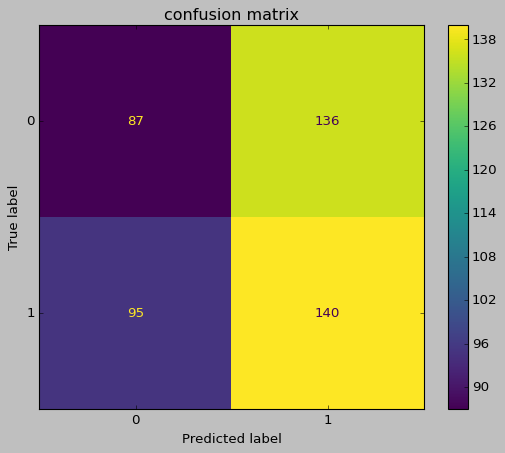

In [260]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


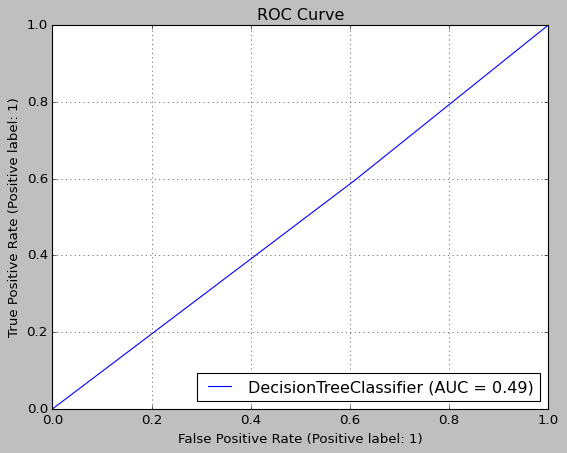

In [261]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Neural network models (supervised)

In [262]:
from sklearn.neural_network import MLPClassifier


In [263]:
mdl = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)
y_pred= mdl.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.19      0.29       223
           1       0.53      0.87      0.66       235

    accuracy                           0.54       458
   macro avg       0.56      0.53      0.47       458
weighted avg       0.56      0.54      0.48       458



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


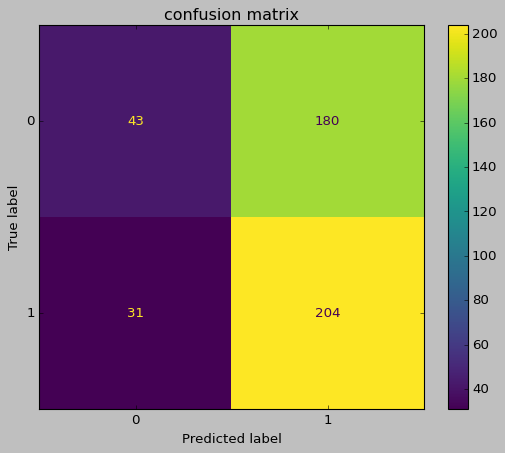

In [264]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [265]:
from sklearn.ensemble import RandomForestClassifier

In [266]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-266-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [267]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.48      0.39      0.43       223
           1       0.51      0.60      0.55       235

    accuracy                           0.50       458
   macro avg       0.49      0.49      0.49       458
weighted avg       0.49      0.50      0.49       458



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


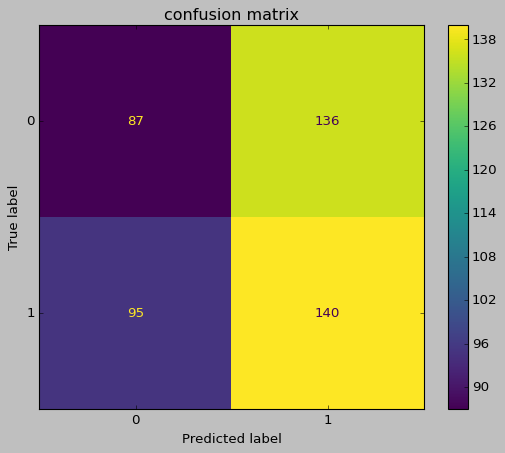

In [268]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


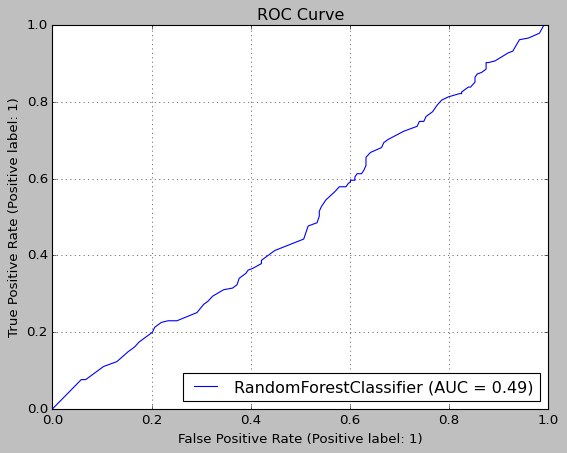

In [269]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [270]:
from sklearn.neural_network import MLPClassifier

In [271]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [272]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.11      0.18       223
           1       0.53      0.94      0.67       235

    accuracy                           0.53       458
   macro avg       0.57      0.52      0.43       458
weighted avg       0.57      0.53      0.43       458



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


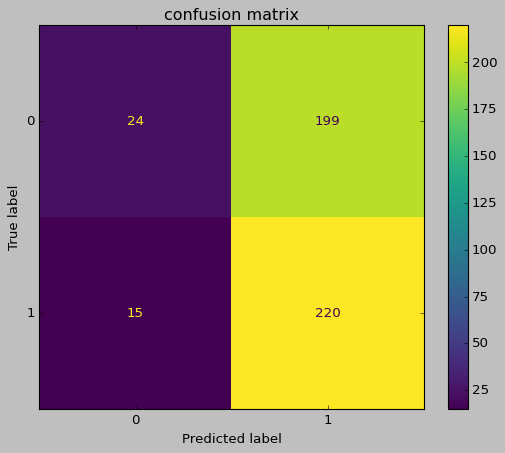

In [273]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [274]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [275]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [276]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [277]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [278]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    916
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11402.51 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based

In [279]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [280]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.580786,0.580786,0.567398,0.770213,0.653430,0.559783,0.002446,0.002191,0.407337,0.002446,0.002191,0.407337,1,True,4
1,NeuralNetTorch,0.539301,0.539301,0.529703,0.910638,0.669797,0.565217,0.023797,0.007867,2.213732,0.023797,0.007867,2.213732,1,True,12
2,NeuralNetFastAI,0.537118,0.537118,0.529412,0.880851,0.661342,0.543478,0.027040,0.012502,0.853952,0.027040,0.012502,0.853952,1,True,10
3,LightGBMXT,0.532751,0.532751,0.525060,0.936170,0.672783,0.543478,0.003858,0.009389,0.419239,0.003858,0.009389,0.419239,1,True,3
4,CatBoost,0.532751,0.532751,0.526854,0.876596,0.658147,0.576087,0.004519,0.001153,0.302533,0.004519,0.001153,0.302533,1,True,7
5,WeightedEnsemble_L2,0.532751,0.532751,0.526854,0.876596,0.658147,0.576087,0.006763,0.002205,1.162859,0.002245,0.001052,0.860326,2,True,14
6,ExtraTreesGini,0.515284,0.515284,0.522648,0.638298,0.574713,0.483696,0.153619,0.097977,0.606601,0.153619,0.097977,0.606601,1,True,8
7,RandomForestEntr,0.510917,0.510917,0.520295,0.600000,0.557312,0.500000,0.171024,0.086531,0.845584,0.171024,0.086531,0.845584,1,True,6
8,RandomForestGini,0.510917,0.510917,0.520295,0.600000,0.557312,0.500000,0.229292,0.081942,0.602041,0.229292,0.081942,0.602041,1,True,5
9,ExtraTreesEntr,0.504367,0.504367,0.513889,0.629787,0.565966,0.483696,0.143537,0.086585,0.589772,0.143537,0.086585,0.589772,1,True,9


# Machine Learning Regression

## important global packages

In [281]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [282]:
R_train.head()

,Unnamed: 0,ROI,ROI_past_average10
1,2,-0.286615,0.256252
2,3,-0.020988,-0.015182
3,4,0.639344,-0.017117
4,5,0.293158,0.146998
5,6,-0.343799,0.176230


In [283]:
X_train = pd.DataFrame(R_train['ROI_past_average10'])
y_train = pd.DataFrame(R_train['ROI'])

In [284]:
R_test.head()

,Unnamed: 0,ROI,ROI_past_average10
0,918,-0.319668,0.227745
1,919,-0.451086,0.193472
2,920,0.331667,0.192793
3,921,4.125766,0.210238
4,922,-0.635588,0.611775


In [285]:
X_test = pd.DataFrame(R_test['ROI_past_average10'])
y_test = pd.DataFrame(R_test['ROI'])

## Linear Regression

In [286]:
from sklearn import linear_model

In [287]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [288]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -1.5287543409876378


In [289]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.581534
1,0.589067
2,0.589217
3,0.585382
4,0.497128
...,...
453,0.621519
454,0.633564
455,0.626694
456,0.618914


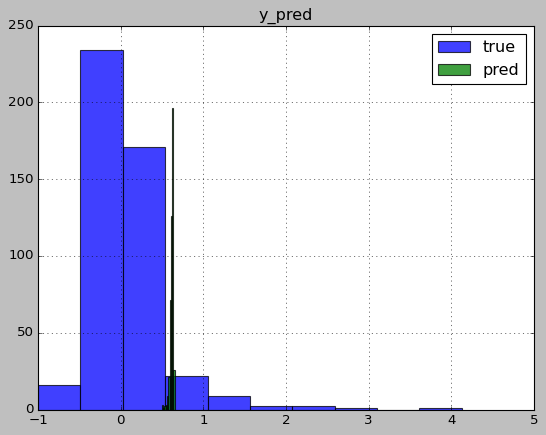

In [290]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [291]:
from sklearn.ensemble import RandomForestRegressor

In [292]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-292-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [293]:
# calculate R2
from sklearn.metrics import r2_score

In [294]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -31.173610276410827


In [295]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,-0.234403
1,-0.254971
2,-0.265248
3,-0.302258
4,-0.623205
...,...
453,0.857446
454,14.158380
455,2.545411
456,0.174258


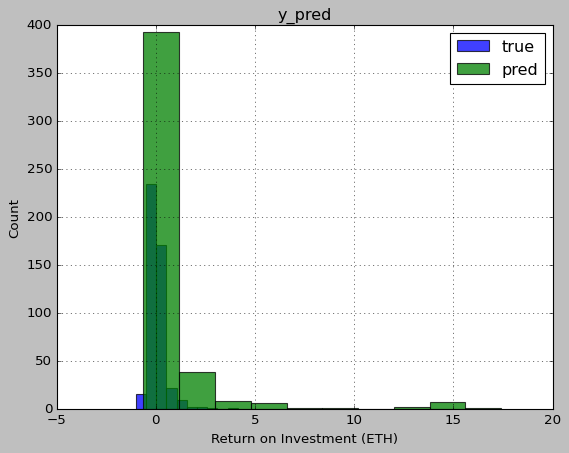

In [296]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)
plt.xlabel('Return on Investment (ETH)')
plt.ylabel('Count')


ax.legend()
fig.show()


## Auto-ML

In [297]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [298]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [299]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.0
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    916
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (39.0, -0.988976377952756, 0.51805, 2.60672)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12522.82 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring da

In [300]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [301]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-0.631668,-0.631668,-0.399004,-0.555222,-0.535877,-1.037661,-2.727671,0.001901,0.002622,0.313240,0.001901,0.002622,0.313240,1,True,4
1,NeuralNetTorch,-0.632368,-0.632368,-0.399889,-0.536271,-0.533317,-1.042181,-2.700689,0.029618,0.009547,7.501638,0.029618,0.009547,7.501638,1,True,10
2,XGBoost,-0.640644,-0.640644,-0.410424,-0.558601,-0.532234,-1.095983,-2.717056,0.051690,0.013976,0.224618,0.051690,0.013976,0.224618,1,True,9
3,LightGBMLarge,-0.643236,-0.643236,-0.413753,-0.561453,-0.522022,-1.112981,-2.726236,0.002350,0.011375,0.678216,0.002350,0.011375,0.678216,1,True,11
4,CatBoost,-0.697365,-0.697365,-0.486317,-0.625301,-0.606840,-1.483557,-2.714413,0.004475,0.001132,0.207909,0.004475,0.001132,0.207909,1,True,6
5,LightGBMXT,-0.799445,-0.799445,-0.639113,-0.732466,-0.742543,-2.263862,-2.696136,0.004120,0.002190,0.167146,0.004120,0.002190,0.167146,1,True,3
6,NeuralNetFastAI,-0.838745,-0.838745,-0.703494,-0.780606,-0.796871,-2.592648,-2.681183,0.032302,0.007077,0.642579,0.032302,0.007077,0.642579,1,True,8
7,WeightedEnsemble_L2,-0.838745,-0.838745,-0.703494,-0.780606,-0.796871,-2.592648,-2.681183,0.034084,0.007687,1.489357,0.001782,0.000610,0.846779,2,True,12
8,KNeighborsUnif,-1.450991,-1.450991,-2.105376,-0.840751,-0.473612,-9.751871,-2.892704,0.018150,0.008685,0.010215,0.018150,0.008685,0.010215,1,True,1
9,KNeighborsDist,-1.586328,-1.586328,-2.516436,-0.844117,-0.438174,-11.851100,-3.090381,0.004159,0.006513,0.005110,0.004159,0.006513,0.005110,1,True,2


In [302]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

R2 Score: -2.592647831799172


In [303]:
y_pred = predictor.predict(X_test)
y_pred

0      0.424408
1      0.509343
2      0.511032
3      0.470050
4      0.229025
         ...   
453    0.818358
454    0.939629
455    0.870460
456    0.792133
457    0.931928
Name: target, Length: 458, dtype: float32

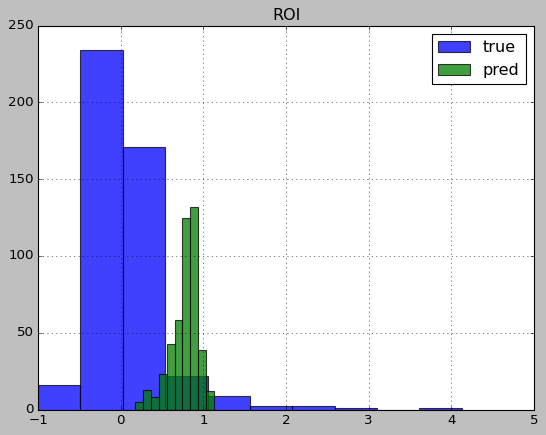

In [304]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Ridge Regression 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge

In [305]:
from sklearn.linear_model import Ridge
import numpy as np

clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
Ridge()

Ridge()

In [306]:
y_pred =clf.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [307]:
y_pred 

,0
0,-0.319523
1,-0.450918
2,0.331708
3,4.125195
4,-0.635405
...,...
453,0.000100
454,0.242856
455,0.076203
456,0.077891


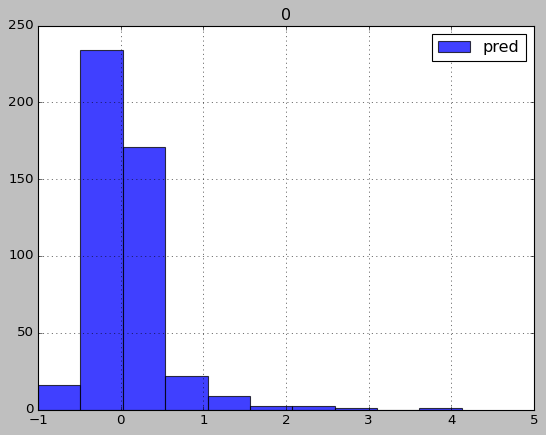

In [308]:
fig, ax = plt.subplots()

y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()

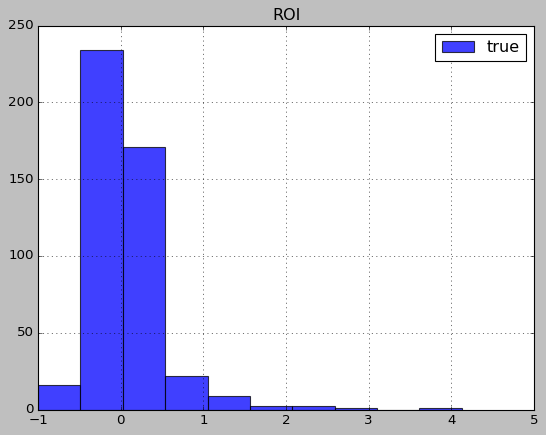

In [309]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)


ax.legend()
fig.show()

In [310]:
clf.score(X_test,y_test)

0.999999934151525

In [311]:
clf.get_params(deep=True)

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [312]:
X_train['ROI_past_average10']

1      0.256252
2     -0.015182
3     -0.017117
4      0.146998
5      0.176230
         ...   
912    0.122099
913    0.166149
914    0.016185
915    0.012544
916    0.340614
Name: ROI_past_average10, Length: 916, dtype: float64

In [313]:
print("Training set score:{}".format(clf.score(X_train,y_train)))
print("ridge.coef_: {}".format(clf.coef_))
print("ridge.intercept_: {}".format(clf.intercept_))

Training set score:0.9999999740442934
ridge.coef_: [[-3.54006403e-05  9.99838595e-01]]
ridge.intercept_: [0.0001019]
